## Support Vector Machines:

Support vector machines focus only on the points that are the most difficult to tell apart, whereas other classifiers pay attention to all of the points. 

The intuition behind the support vector machine approach is that if a classifier is good at the most challenging comparisons (the points in B and A that are closest to each other in Figure 2), then the classifier will be even better at the easy comparisons (comparing points in B and A that are far away from each other). 

**Perceptrons and other classifiers:**

Perceptrons are built by taking one point at a time and adjusting the dividing line accordingly. As soon as all of the points are separated, the perceptron algorithm stops. But it could stop anywhere. Figure 1 shows that there are a bunch of different dividing lines that separate the data. The perceptron's stopping criteria is simple: "separate the points and stop improving the line when you get 100% separation". The perceptron is not explicitly told to find the best separating line. Logistic regression and linear discriminant models are built similarly to perceptrons. 

The best dividing line maximizes the distance between the B points closest to A and the A points closest to B. It's not necessary to look at all of the points to do this. In fact, incorporating feedback from points that are far away can bump the line a little too far, as seen below. 

<p>
        <img src = assets/1.png/>
</p>

**Support Vector Machines:**

Unlike other classifiers, the support vector machine is ***explicitly*** told to find the best separating line. How? The support vector machine searches for the closest points (Figure 2), which it calls the "support vectors" (the name "support vector machine" is due to the fact that points are like vectors and that the best line "depends on" or is "supported by" the closest points). 

Once it has found the closest points, the SVM draws a line connecting them (see the line labeled 'w' in Figure 2). It draws this connecting line by doing vector subtraction (point A - point B). The support vector machine then declares the best separating line to be the line that bisects -- and is perpendicular to -- the connecting line.  

The support vector machine is better because when you get a new sample (new points), you will have already made a line that keeps B and A as far away from each other as possible, and so it is less likely that one will spillover across the line into the other's territory. 

<p>
        <img src = assets/2.png/>
</p>

The paper called *[Duality and Geometry in SVM Classifiers](http://www.robots.ox.ac.uk/~cvrg/bennett00duality.pdf)* finally helped me see the light; that's where I got the images from. 


## Mathematical overview of how SVM's are trained and used:


## Notations ##

In the following, scalars are denoted with italic lowercases (e.g., $y,\, b$), vectors with bold lowercases (e.g., $\mathbf{w},\, \mathbf{x}$), and matrices with italic uppercases (e.g., $W$). $\mathbf{w^T}$ is the transpose of $\mathbf{w}$, and $\|\mathbf{w}\| = \mathbf{w}^T\mathbf{w}$.

Let:

- $\mathbf{x}$ be a feature vector (i.e., the input of the SVM). $\mathbf{x} \in \mathbb{R}^n$, where $n$ is the dimension of the feature vector.
- $y$ be the class (i.e., the output of the SVM). $y \in \{ -1,1\}$, i.e. the classification task is binary. 
- $\mathbf{w}$ and $b$ be the parameters of the SVM: we need to learn them using the training set.
- $(\mathbf{x}^{(i)}, y^{(i)})$ be the $i^ {\text {th}}$ sample in the dataset. Let's assume we have $N$ samples in the training set.

With $n=2$, one can represent the SVM's decision boundaries as follows:

<p>
        <img src = assets/3.png/ width = 400px height = 400px>
</p>

The class $y$ is determined as follows:

$$ 
y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \ge 1 \\
                \end{array}
              \right.
$$

which can be more concisely written as $y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1$.

## Goal  ##

The SVM aims at satisfying two requirements:

1. The SVM should maximize the distance between the two decision boundaries. Mathematically, this means we want to maximize the distance between the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = -1$ and the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = 1$. [This distance is equal to $\frac{2}{\|\mathbf{w}\|}$](https://math.stackexchange.com/a/1306417/168764). This means we want to solve $\underset{\mathbf{w}}{\operatorname{max}} \frac{2}{\|\mathbf{w}\|}$. Equivalently we want
$\underset{\mathbf{w}}{\operatorname{min}} \frac{\|\mathbf{w}\|}{2}$.

2. The SVM should also correctly classify all $\mathbf{x}^{(i)}$, which means $y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1, \forall i \in \{1,\dots,N\}$


Which leads us to the following quadratic optimization problem:

$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 &\forall i \in \{1,\dots,N\}
\end{align}$$

This is the **hard-margin SVM**, as this quadratic optimization problem admits a solution iff the data is linearly separable. 

One can relax the constraints by introducing so-called **slack variables** $\xi^{(i)}$. Note that each sample of the training set has its own slack variable. This gives us the following quadratic optimization problem:


$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}$$

This is the **soft-margin SVM**. $C$ is a hyperparameter called **penalty of the error term**.
 ([What is the influence of C in SVMs with linear kernel?](https://stats.stackexchange.com/q/31066/12359) and [Which search range for determining SVM optimal parameters?](https://stats.stackexchange.com/q/43943/12359)).

One can add even more flexibility by introducing a function $\phi$ that maps the original feature space to a higher dimensional feature space. This allows non-linear decision boundaries. The quadratic optimization problem becomes:

$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}$$


## Optimization  ##


### Solving using the Lagrangian:

<p>
        <img src = assets/4.png/ width = 400px height = 400px>
</p>


<p>
        <img src = assets/5.png/ width = 600px height = 600px>
</p>

### Hence, the optimization depends on the dot product of pairs of examples
--------------------------------------------------------------------------------------------
-------------------
The quadratic optimization problem can be transformed into another optimization problem named the [**Lagrangian dual problem**](https://en.wikipedia.org/w/index.php?title=Duality_(optimization)&oldid=755311099#Convex_problems) (the previous problem is called the **primal**):

$$\begin{align}
\max_{\mathbf{\alpha}}  \quad &\min_{\mathbf{w},b}  \frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \alpha^{(i)} \left(1-\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b)\right), \\
s.t. \quad&0 \leq  \alpha^{(i)} \leq C, &\forall i \in \{1,\dots,N\} 
\end{align}$$

This optimization problem can be simplified (by setting some gradients to $0$) to:

$$\begin{align}
\max_{\mathbf{\alpha}}  \quad & \sum_{i=1}^{N} \alpha^{(i)} - \sum_{i=1}^{N}\sum_{j=1}^{N}  \left( y^{(i)}\alpha^{(i)}\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right) y^{(j)}\alpha^{(j)} \right), \\
s.t. \quad&0 \leq  \alpha^{(i)} \leq C, &\forall i \in \{1,\dots,N\}  
\end{align}$$

$\mathbf{w}$ doesn't appear as $\mathbf{w}=\sum_{i =1}^{N}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)$ (as stated by the [representer theorem](https://en.wikipedia.org/wiki/Representer_theorem)).

We therefore learn the $\alpha^{(i)}$ using the $(\mathbf{x}^{(i)}, y^{(i)})$ of the training set.

(FYI: [Why bother with the dual problem when fitting SVM?](https://stats.stackexchange.com/q/19181/12359) short answer: faster computation + allows to use the kernel trick, though there exist some good methods to train SVM in the primal e.g. see  {1})

## Making a prediction  ##

Once the $\alpha^{(i)}$ are learned, one can predict the class of a new sample with the feature vector $\mathbf{x}^{\text {test}}$ as follows:

\begin{align*}
y^{\text {test}}&=\text {sign}\left(\mathbf{w^T}\phi\left(\mathbf{x}^{\text {test}}\right)+b\right) \\
&= \text {sign}\left(\sum_{i =1}^{N}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)^T\phi\left(\mathbf{x}^{\text {test}}\right)+b \right)
\end{align*}

The summation $\sum_{i =1}^{N}$ could seem overwhelming, since it means one has to sum over all the training samples, but the vast majority of $\alpha^{(i)}$ are $0$ (see [Why are the Lagrange multipliers sparse for SVMs?](https://stats.stackexchange.com/q/54976/12359)) so in practice it isn't an issue. (note that [one can construct special cases where all $\alpha^{{(i)}} > 0$](https://stats.stackexchange.com/q/110598/12359).) $\alpha^{{(i)}}=0$ iff $x^{{(i)}}$ is a **support vector**. The illustration above has 3 support vectors.

# Some comments on Duality and KTT conditions
### Primal problem

Picking up from @Antoni's post in between equations $(4)$ and $(5)$, recall that our original, or **primal**, optimization problem is of the form: 


\begin{aligned}
	\min_{w, b} f(w,b) & = \min_{w, b}  \  \frac{1}{2} ||w||^2
	\\
	s.t. \ \  g_i(w,b) &= - y^{(i)} (w^T x^{(i)} + b) + 1 = 0 
\end{aligned}


### Lagrange method
The method of Lagrange multipliers allows us to turn a constrained optimization problem into an unconstrained one of the form:

$$\mathcal{L}(w, b, \alpha) =   \frac{1}{2} ||w||^2 - \sum_i^m \alpha_i [y^{(i)} (w^T x^{(i)} + b) - 1]$$

Where  $\mathcal{L}(w, b, \alpha)$ is called the **Lagrangian** and $\alpha_i$ are called the **Lagrangian multipliers**.  

Our **primal** optimization problem with the Lagrangian becomes the following: (note that the use of $min$, $max$ is not the most rigorous as we should also be using $\inf$ and $\sup$ here...)

$$ \min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right)$$

### Dual problem
What @Antoni and Prof. Patrick Winston have done in their derivation is assume that the optimization function and the constraints meet some technical conditions such that we can do the following: 

$$ \min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right) =   \max_\alpha \left( \min_{w,b} \mathcal{L}(w, b, \alpha)\right)$$

This allows us to take the partial derivatives of $\mathcal{L}(w, b, \alpha)$ with respect to $w$ and $b$, equate to zero and then plug the results back into the original equation of the Lagrangian, hence generating an equivalent **dual** optimization problem of the form


\begin{aligned}
	&\max_{\alpha} \min_{w,b} \mathcal{L}(w,b,\alpha)
	\\
	& \max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}> 
	\\
	& s.t. \ \alpha_i \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha_i y^{(i)} = 0	
\end{aligned}
 
### Duality and KTT
Without going into excessive mathematical technicalities, these conditions are a combination of the Duality and the Karush Kuhn Tucker (KTT) conditions and allow us to solve the **dual** problem instead of the **primal** one, while ensuring that the optimal solution is the same. In our case the conditions are the following: 

- The primal objective and inequality constraint functions must be convex
- The equality constraint function must be affine
- The constraints must be strictly feasible


Then there exists $w^*, \alpha^*$ which are solutions to the primal and dual problems. Moreover, the parameters $w^*, \alpha^*$ satisfy the KTT conditions below:

 
\begin{aligned}
	&\frac{\partial}{\partial w_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(A)
	\\
	&\frac{\partial}{\partial \beta_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(B)
	\\
	&\alpha_i^* g_i(w^*) = 0 &(C)
	\\
	&g_i(w^*) \leq 0  &(D)
	\\
	&\alpha_i^* \geq 0 &(E)
\end{aligned}


Moreover, if some $w^*, \alpha^*$ satisfy the KTT solutions then they are also solution to the primal and dual problem. 



Equation $(C)$ above is of particular importance and is called the *dual complementarity condition*. It implies that if $\alpha_i^* > 0$ then $g_i(w^*) = 0$ which means that the constraint $g_i(w) \leq 0$ is active, i.e. it holds with equality rather than inequality. This is the explanation behind equation $(2)$ in Antoni's derivation where the inequality constraint is turned into an equality constraint. 

### A intuitive but informal diagram

<p>
        <img src = assets/6.png/>
</p>

----------
---------
## Kernel trick  ##

One can observe that the optimization problem uses the $\phi\left(\mathbf{x}^{(i)}\right)$ only in the inner product $\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right)$. The function that maps $\left(\mathbf{x}^{(i)},\mathbf{x}^{(j)}\right)$ to the inner product $\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right)$ is [called](https://stats.stackexchange.com/a/226196/12359) a **kernel**, a.k.a. kernel function, often denoted by $k$.

One can choose $k$ so that the inner product is efficient to compute. This allows to use a potentially high feature space at a low computational cost. That is called the [**kernel trick**](https://en.wikipedia.org/w/index.php?title=Kernel_method&oldid=747269865#Mathematics:_the_kernel_trick). For a kernel function to be *valid*, i.e. usable with the kernel trick, it should satisfy [two key properties](https://stats.stackexchange.com/q/48506/12359). There exist [many kernel functions to choose from](https://stats.stackexchange.com/q/18030/12359). As a side note, the kernel trick [may be applied to other machine learning models](https://stats.stackexchange.com/q/2167/12359), in which case they are referred as [*kernelized*](https://scholar.google.com/scholar?q=kernelized+&hl=en&as_sdt=0,22).

## Going further  ##

Some interesting QAs on SVMs:

- [Best way to perform multiclass SVM](https://stats.stackexchange.com/q/21465/12359)
- [Support vector machines and regression](https://stats.stackexchange.com/q/13194/12359)
- [Understanding the different formulations for SVM](https://stats.stackexchange.com/q/157827/12359)
- [What's the difference between $\ell_1$-SVM, $\ell_2$-SVM and LS-SVM loss functions?](https://stats.stackexchange.com/q/255486/12359)
- To deal with an unbalanced dataset:
 - [Best way to handle unbalanced multiclass dataset with SVM](https://stats.stackexchange.com/q/20948/12359)
 - [A priori selection of SVM class weights](https://stats.stackexchange.com/a/24969/12359)
- [How does one interpret SVM feature weights?](https://stats.stackexchange.com/q/39243/12359)
- [Interpretating the C value in a linear SVM](https://stats.stackexchange.com/q/108639/12359)
- [Generalization bounds on SVM](https://stats.stackexchange.com/q/259788/12359)
- [General formula for the VC Dimension of a SVM](https://stats.stackexchange.com/q/255301/12359)
- [What does the "machine" in "support vector machine" and "restricted Boltzmann machine" mean?](https://stats.stackexchange.com/q/261041/12359)
- [How are SVMs = Template Matching?](https://stats.stackexchange.com/q/263587/12359)
- [Single layer NeuralNetwork with ReLU activation equal to SVM?](https://stats.stackexchange.com/q/190883/12359)
- [Comparing SVM and logistic regression](https://stats.stackexchange.com/q/95340/12359)

Other links:

-  [Least squares support vector machine](https://en.wikipedia.org/wiki/Least_squares_support_vector_machine)

----------
References:

- {1} Chapelle, Olivier. "Training a support vector machine in the primal." Neural computation 19, no. 5 (2007): 1155-1178. https://scholar.google.com/scholar?cluster=469291847682573606&hl=en&as_sdt=0,22 ; http://www.chapelle.cc/olivier/pub/neco07.pdf


## Code sample 1: SVM using cvxopt

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from cvxopt import matrix, solvers

 x: (100, 2) and y: (100,)


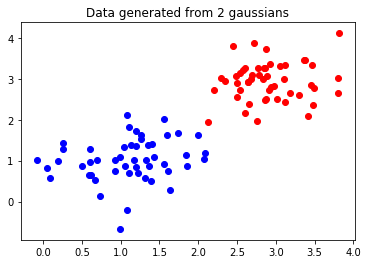

In [29]:
# Generating the data

DIM = 2
COLORS = ['red', 'blue']

# 2-D mean of ones
M1 = np.ones(DIM, )

# 2-D mean of threes
M2 = 3*np.ones(DIM, )

# 2-D covariance of 0.3
C1 = np.diag(0.3*np.ones(DIM, ))

# 2-D covariance of 0.2
C2 = np.diag(0.2*np.ones(DIM, ))

def generate_gaussian(m , c, num):
    return np.random.multivariate_normal(m, c, num)

def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
        plt.title('Data generated from 2 gaussians')
    plt.show()

NUM = 50

if __name__ == '__main__':
    # generate 50 points from gaussian 1
    x1 = generate_gaussian(M1, C1, NUM)
    
    # labels
    y1 = np.ones(x1.shape[0], )
    
    # generate 50 points from gaussian 2
    x2 = generate_gaussian(M2, C2, NUM)
    y2 = -np.ones(x2.shape[0], )
    
    # join
    x = np.concatenate((x1, x2), axis = 0)
    y = np.concatenate((y1, y2), axis = 0)
    
    print(f" x: {x.shape} and y: {y.shape}")
    
    plot_data_with_labels(x, y)
    
    with open('gaussiandata.pickle', 'wb') as f:
        pickle.dump((x,y), f)

### Fitting an SVM

<p>
        <img src = assets/7.png/ width = 1800px height = 1800px>
</p>
    

In [30]:
def fit(x, y):
    NUM = x.shape[0]
    DIM = x.shape[1]
    # we'll solve the dual
    # obtain the kernel
    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    return alphas

Note that `sol['x']` contains the x that was part of cvxopt interface - it is our α. Now if you are familiar with SVMs, you will know that only a few of the alphas should be non-zero and they will be our support vectors. Using these alphas, we can obtain w and b from our original SVM problem. Once we do that, they will together define the decision boundary. w is equal to Σiαiyixi and b is equal to yi−wTxi for any i such that αi>0. So we do the following to obtain them.

In [31]:
with open('gaussiandata.pickle', 'rb') as f:
    data = pickle.load(f)

x, y = data[0], data[1]

# fit svm classifier

alphas = fit(x, y)

# get weights
w = np.sum(alphas * y[:, None] * x, axis = 0)

# get bias
cond = (alphas > 1e-4).reshape(-1)
b = y[cond] - np.dot(x[cond], w)
bias = b[0]

Finally, we’ll plot the decision boundary for good visualizaiton. Since it will be a line in this case, we need to obtain the slope and intercept of the line from the weights and bias. 

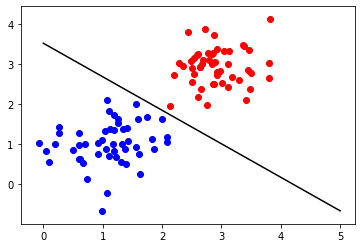

In [33]:
def plot_data_with_labels(x, y, ax):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])

def plot_separator(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')

# # normalize
# norm = np.linalg.norm(w)
# w, bias = w / norm, bias / norm

fig, ax = plt.subplots()
plot_separator(ax, w, bias)
plot_data_with_labels(x, y, ax)
plt.show()

## Code sample 2: SVM using cvxopt

<p>
    <img src = assets/9.png>
</p>

<p>
    <img src = assets/10.png>
</p>

<p>
    <img src = assets/11.png>
</p>

<p>
    <img src = assets/12.png>
</p>

<p>
    <img src = assets/13.png>
</p>

<p>
    <img src = assets/14.png>
</p>

**We introduce an additional variable stickily for convenience. The variable y will be equal to positive one for all positive samples and negative one for all negative samples.**

<p>
    <img src = assets/15.png>
</p>

<p>
    <img src = assets/16.png>
</p>

**Next, we need to address the process by which we go about maximizing the margin. To get an equation for the width of the margin, we subtract the first support vector from the one below it and the multiply the result by the unit vector of w which is always perpendicular to the decision boundary.**

<p>
    <img src = assets/17.png>
</p>

**Using the constraints from above and a bit of algebra, we get the following.**

<p>
    <img src = assets/18.png>
</p>


**Therefore, in order to select the optimal decision boundary, we must maximize the equation we just computed.**

<p>
    <img src = assets/19.png>
</p>

**Now, in most machine learning algorithms, we’d use something like gradient descent to minimize said function, however, for support vector machines, we use the Lagrangian. In essence, using Lagrangian, we can solve for the global minimum like we’d do in high school level calculus (i.e. take the derivative of the function and make it equal to zero). The Lagrange tells us to subtract the cost function by the summation over all the constraints where each of those constraints will be multiplied by some constant alpha (normally written as lambda for the Lagrangian).**

<p>
    <img src = assets/4.png>
</p>

**Then, we perform some more algebra, plugging the equations we found in the previous step back into the original equation.**

<p>
    <img src = assets/5.png>
</p>


**Before we can proceed any further, we need to express the equation in terms of matrices instead of summations. The reason being, the** `qp` **function from the CVXOPT library, which we’ll use to solve the Lagrangian, accepts very specific arguments. Thus, we need to go from:**

<p>
    <img src = assets/20.png>
</p>

<p>
    <img src = assets/21.png>
</p>

<p>
    <img src = assets/22.png>
</p>

<p>
    <img src = assets/23.png>
</p>

<p>
    <img src = assets/24.png>
</p>

In [1]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
class SVM:
    def fit(self, X, Y):
        

### REFERENCES:
- [In depth SVM](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
- [SVM example](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)
- [SVM python](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)
- [Support Vector Machine: Python implementation using CVXOPT](https://xavierbourretsicotte.github.io/SVM_implementation.html)
- [SVM CVXOPT](http://goelhardik.github.io/2016/11/28/svm-cvxopt/)
- [How does a Support Vector Machine (SVM) work?](https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work/353605#353605)
- [Help me understand Support Vector Machines](https://stats.stackexchange.com/questions/3947/help-me-understand-support-vector-machines)
- [MIT Prof. Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o&feature=youtu.be)
- [How can SVM 'find' an infinite feature space where linear separation is always possible?](https://stats.stackexchange.com/questions/80398/how-can-svm-find-an-infinite-feature-space-where-linear-separation-is-always-p/168309#168309)
- [Khan academy Lagrange multiplier](https://www.youtube.com/watch?v=hQ4UNu1P2kw)
- [Support Vector Machine — Using Numpy](https://medium.com/@saishruthi.tn/support-vector-machine-using-numpy-846f83f4183d)
- [Mathematics behind SVM(Support Vector Machine)](https://towardsdatascience.com/mathematics-behind-svm-support-vector-machines-84742ddda0ca)
- [Math behind SVM (Support Vector Machine)](https://medium.com/@ankitnitjsr13/math-behind-support-vector-machine-svm-5e7376d0ee4d)
- [SVM From Scratch — Python](https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2)